<a href="https://colab.research.google.com/github/SaraKarim23/SVM-to-Classify-the-samples-are-Benign-or-Malignant-regarding-Breast-Cancer/blob/main/SVM_to_Classify_the_samples_are_Benign_or_Malignant_regarding_Breast%C2%A0Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets Source

This data was originally prepared by Asuncion and Newman in 2007. It is available at UCI Machine Learning Repository.

You will find the csv file in this public source : https://s3-api.us-geo.objectstorage.softlayer.net

#  Description 

There are 700 records and from each row we have multiple parameters that have been measured and recorded.

We are using a datasets that has 10 predictors(column) and 700 samples (rows).

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are Benign (value = 2) or Malignant (value = 4).



# Importing Libraries 







In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load Data



In [3]:
cell_df = pd.read_csv('/content/drive/My Drive/cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#Last 5 rows of Data

In [4]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


#If your curious mind wants to know how many data are there in these total record then you can use shape( ).

In [5]:
cell_df.shape

(699, 11)

# The amount it take to store in the memory in bytes.

In [6]:
cell_df.size

7689

#Column-wise counts of values available in each column.

In [7]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [8]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#Distribution of the Classes

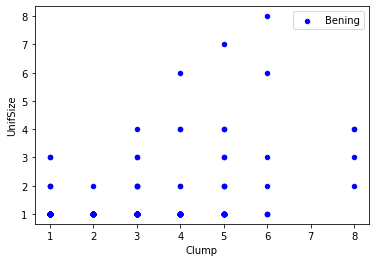

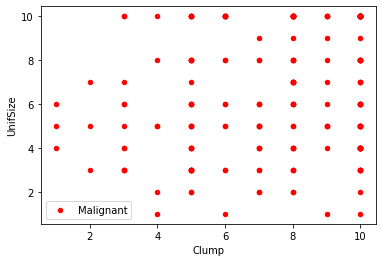

In [9]:
bening_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = bening_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Bening')

malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant')

#help(bening_df.plot)

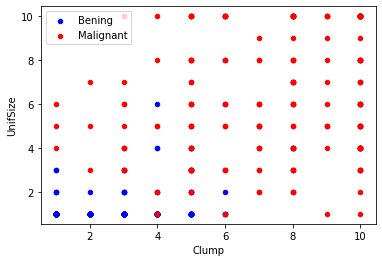

In [10]:
bening_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = bening_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Bening')

malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

#Identifying the unwanted Rows

First let's see the datatypes of individual column.

In [ ]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

#Remove unwanted Columns

In [12]:
cell_df.columns

feature_df = cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit',]]

X = np.asarray(feature_df)

y = np.asarray(cell_df['Class'])

y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

#Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)


546 x 9

In [ ]:
X_train.shape


(546, 9)

546 x 1

In [ ]:
y_train.shape


(546,)

137 x 9

In [ ]:
X_test.shape

(137, 9)

137 x 1

In [ ]:
y_test.shape

(137,)

# Modeling

In [ ]:
from sklearn import svm
from sklearn.externals import joblib
import pandas as pd 
import numpy as np 

 
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Predict and Evaluate the model

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# And we successfully have a accuracy of 96%. That’s cool enough...!!!